In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import norm

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=False)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', 500)

%matplotlib inline
%load_ext autotime

In [2]:
acs_data1 = pd.read_csv('psam_pusc.csv') # C contains the NYS data

acs_data = acs_data1[acs_data1['ST'] == 36]

del acs_data1

time: 3min 6s


In [11]:
pumas = pd.read_csv('../nyc_puma_neighborhood.csv')
nyc_data = acs_data[acs_data['PUMA'].isin( pumas['PUMA5CE'].unique() )]

del pumas
del acs_data

time: 9.76 ms


In [24]:
nyc_data.to_csv('acs_NYC_only.csv')

time: 53.8 s


In [26]:
################################################################################################
###############################Get the population breakdown#####################################
################################################################################################

time: 4.2 ms


In [2]:
nyc_data = pd.read_csv('acs_NYC_only.csv')

time: 15.4 s


In [3]:
# For column ['HISP']; 1 = Not hispanic; All other values are hispanic
# For column ['RAC1P']; 1 = White; 2 = Black; 3,4,5 = Native; 6 = Asian; 7,8,9 = Other

nyc_data[['AGEP', 'HISP', 'RAC1P']]

,AGEP,HISP,RAC1P
0,78,1,2
1,19,1,1
2,50,3,2
3,28,3,2
4,21,3,2
5,2,3,2
6,69,3,1
7,55,1,1
8,50,1,1
9,19,1,1


time: 49.8 ms


In [4]:
# Recreate ACS FactFinder Numbers
# nyc_data[['AGEP', 'HISP', 'RAC1P', 'PWGTP']]

total_pop = nyc_data['PWGTP'].sum()
hisp_white = float(nyc_data[(nyc_data['HISP'] != 1) & (nyc_data['RAC1P'] == 1)]['PWGTP'].sum())
hisp_black = float(nyc_data[(nyc_data['HISP'] != 1) & (nyc_data['RAC1P'] == 2)]['PWGTP'].sum())
black = float(nyc_data[(nyc_data['HISP'] == 1) & (nyc_data['RAC1P'] == 2)]['PWGTP'].sum())
white = float(nyc_data[(nyc_data['HISP'] == 1) & (nyc_data['RAC1P'] == 1)]['PWGTP'].sum())
asian = float(nyc_data[ nyc_data['RAC1P'] == 6 ]['PWGTP'].sum())
native = float(nyc_data[ nyc_data['RAC1P'].isin([3,4,5]) ]['PWGTP'].sum())
other = total_pop - hisp_white - hisp_black - black - white - asian - native

time: 1.87 s


In [5]:
print("Black: {}\nWhite: {}\nHispanic Black: {}\nHispanic White: {}\nAsian: {}\nNative: {}\nOther: {}\nTotal: {}".format(
    black, white, hisp_black, hisp_white, asian, native, other, total_pop))

Black: 1886315.0
White: 2748423.0
Hispanic Black: 197537.0
Hispanic White: 914530.0
Asian: 1199896.0
Native: 33011.0
Other: 1581415.0
Total: 8561127
time: 1.21 ms


In [6]:
# Now, break into adult male/female populations

nyc_adult = nyc_data[nyc_data['AGEP'] > 17]

nyc_adult_male = nyc_adult[nyc_adult['SEX'] == 1]
nyc_adult_female = nyc_adult[nyc_adult['SEX'] == 2]

time: 2.4 s


In [7]:
total_pop_male = nyc_adult_male['PWGTP'].sum()
hisp_white_male = float(nyc_adult_male[(nyc_adult_male['HISP'] != 1) & (nyc_adult_male['RAC1P'] == 1)]['PWGTP'].sum())
hisp_black_male = float(nyc_adult_male[(nyc_adult_male['HISP'] != 1) & (nyc_adult_male['RAC1P'] == 2)]['PWGTP'].sum())
black_male = float(nyc_adult_male[(nyc_adult_male['HISP'] == 1) & (nyc_adult_male['RAC1P'] == 2)]['PWGTP'].sum())
white_male = float(nyc_adult_male[(nyc_adult_male['HISP'] == 1) & (nyc_adult_male['RAC1P'] == 1)]['PWGTP'].sum())
asian_male = float(nyc_adult_male[ nyc_adult_male['RAC1P'] == 6 ]['PWGTP'].sum())
native_male = float(nyc_adult_male[ nyc_adult_male['RAC1P'].isin([3,4,5]) ]['PWGTP'].sum())
other_male = total_pop_male - hisp_white_male - hisp_black_male - black_male - white_male - asian_male - native_male

time: 572 ms


In [8]:
total_pop_female = nyc_adult_female['PWGTP'].sum()
hisp_white_female = float(nyc_adult_female[(nyc_adult_female['HISP'] != 1) & (nyc_adult_female['RAC1P'] == 1)]['PWGTP'].sum())
hisp_black_female = float(nyc_adult_female[(nyc_adult_female['HISP'] != 1) & (nyc_adult_female['RAC1P'] == 2)]['PWGTP'].sum())
black_female = float(nyc_adult_female[(nyc_adult_female['HISP'] == 1) & (nyc_adult_female['RAC1P'] == 2)]['PWGTP'].sum())
white_female = float(nyc_adult_female[(nyc_adult_female['HISP'] == 1) & (nyc_adult_female['RAC1P'] == 1)]['PWGTP'].sum())
asian_female = float(nyc_adult_female[ nyc_adult_female['RAC1P'] == 6 ]['PWGTP'].sum())
native_female = float(nyc_adult_female[ nyc_adult_female['RAC1P'].isin([3,4,5]) ]['PWGTP'].sum())
other_female = total_pop_female - hisp_white_female - hisp_black_female - black_female - white_female - asian_female - native_female

time: 548 ms


In [32]:
print("Adult Males\nBlack: {}\nWhite: {}\nHispanic Black: {}\nHispanic White: {}\nAsian: {}\nNative: {}\nOther: {}\nTotal: {}".format(
    black_male, white_male, hisp_black_male, hisp_white_male, asian_male, native_male, other_male, total_pop_male))

Adult Males
Black: 644695.0
White: 1104570.0
Hispanic Black: 62723.0
Hispanic White: 343358.0
Asian: 458878.0
Native: 12585.0
Other: 537409.0
Total: 3164218
time: 1.11 ms


In [33]:
print("Adult Females\nBlack: {}\nWhite: {}\nHispanic Black: {}\nHispanic White: {}\nAsian: {}\nNative: {}\nOther: {}\nTotal: {}".format(
    black_female, white_female, hisp_black_female, hisp_white_female, asian_female, native_female, other_female, total_pop_female))

Adult Females
Black: 830958.0
White: 1186118.0
Hispanic Black: 81204.0
Hispanic White: 366826.0
Asian: 523961.0
Native: 12659.0
Other: 600492.0
Total: 3602218
time: 1.01 ms


In [26]:
ethnic_proportions_adult_male = [black_male, hisp_white_male, white_male, 
                                 hisp_black_male, asian_male, native_male]

time: 660 µs


In [27]:
ethnic_proportions_adult_female = [black_female, hisp_white_female, white_female, 
                                 hisp_black_female, asian_female, native_female]

time: 681 µs


In [11]:
arrests = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv', parse_dates=['ARREST_DATE'])

time: 29.6 s


In [23]:
arrests_adult = arrests[arrests['AGE_GROUP'] != '<18']
arrests_adult_male = arrests_adult[arrests_adult['PERP_SEX'] == 'M']
arrests_adult_female = arrests_adult[arrests_adult['PERP_SEX'] == 'F']

time: 295 ms


In [28]:
arrests_counts_adult_male = arrests_adult_male['PERP_RACE'].value_counts()
arrests_counts_adult_male.drop('UNKNOWN', inplace = True)
arrests_counts_adult_male = arrests_counts_adult_male/np.array(ethnic_proportions_adult_male)
arrests_counts_adult_male

BLACK                             0.140518
WHITE HISPANIC                    0.143946
WHITE                             0.020724
BLACK HISPANIC                    0.275736
ASIAN / PACIFIC ISLANDER          0.022642
AMERICAN INDIAN/ALASKAN NATIVE    0.044736
Name: PERP_RACE, dtype: float64

time: 31.4 ms


Text(0.5, 1.0, 'Rate of Arrest By Race For Adult Males')

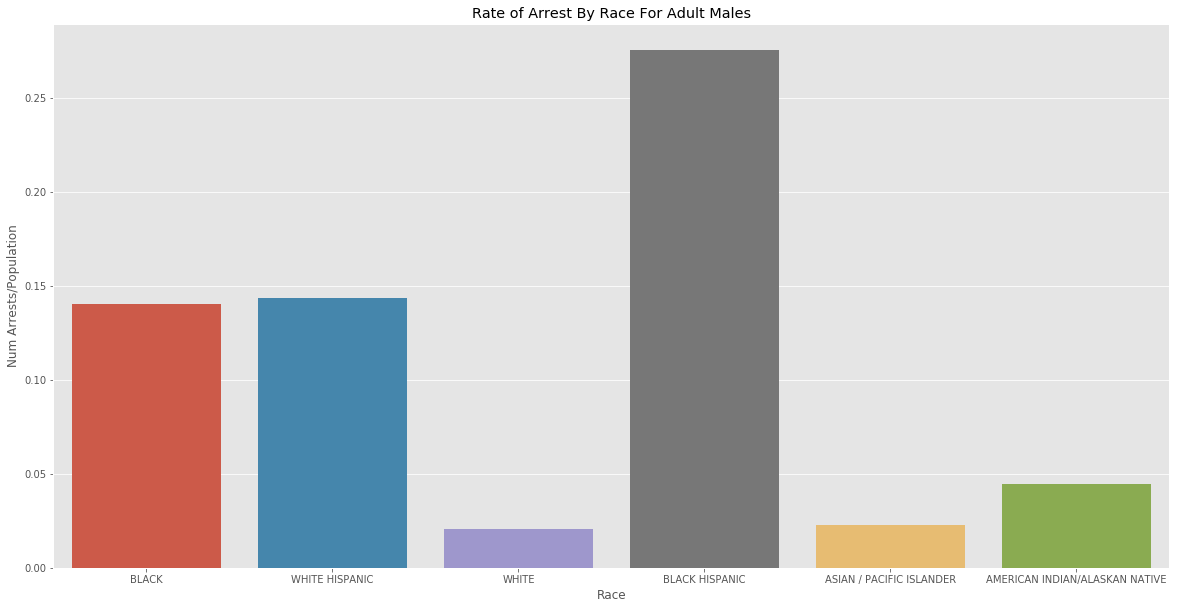

time: 755 ms


In [29]:
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(arrests_counts_adult_male.index, arrests_counts_adult_male.tolist())
ax.set(xlabel = 'Race', ylabel = 'Num Arrests/Population')
plt.title("Rate of Arrest By Race For Adult Males")

In [15]:
arrests_counts_adult_female = arrests_adult_female['PERP_RACE'].value_counts()
# arrests_counts_adult_female.drop('UNKNOWN', inplace = True)
arrests_counts_adult_female = arrests_counts_adult_female/np.array(ethnic_proportions_adult_female)
arrests_counts_adult_female

BLACK                             0.030932
WHITE HISPANIC                    0.030510
WHITE                             0.005606
BLACK HISPANIC                    0.046729
ASIAN / PACIFIC ISLANDER          0.005110
AMERICAN INDIAN/ALASKAN NATIVE    0.008423
Name: PERP_RACE, dtype: float64

time: 13 ms


Text(0.5, 1.0, 'Rate of Arrest By Race For Adult Females')

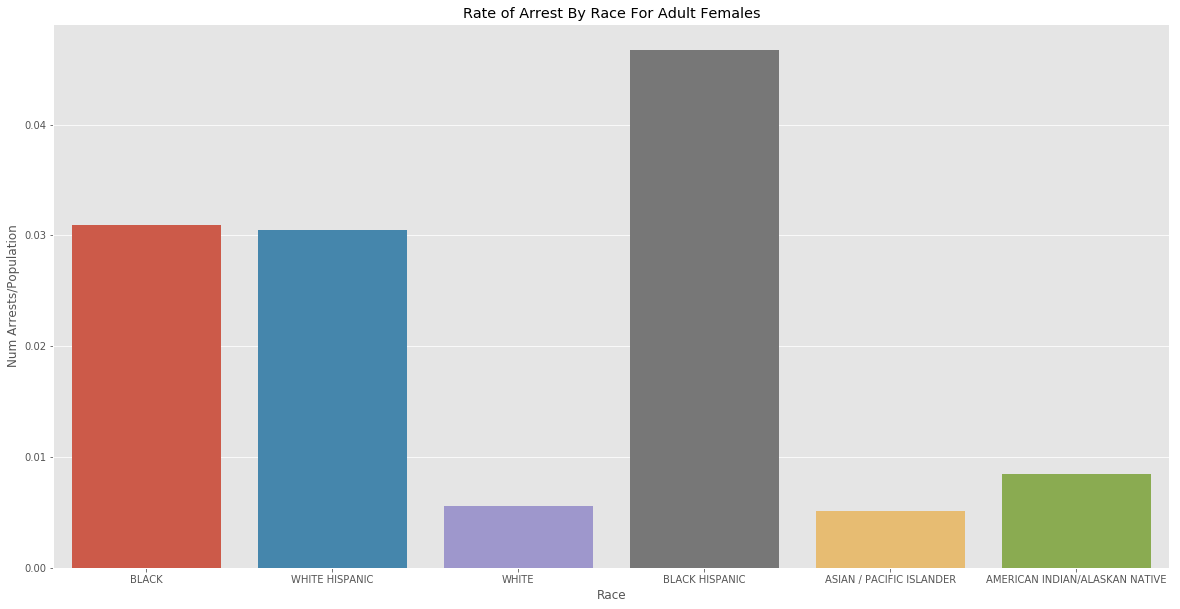

time: 718 ms


In [16]:
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(arrests_counts_adult_female.index, arrests_counts_adult_female.tolist())
ax.set(xlabel = 'Race', ylabel = 'Num Arrests/Population')
plt.title("Rate of Arrest By Race For Adult Females")

In [59]:
# Finding vtl related arrests (law code 511)
arrests_vtl = arrests[arrests['LAW_CODE'].str.contains('511').fillna(False)]['PERP_RACE'].value_counts()
arrests_vtl

BLACK                             8872
WHITE HISPANIC                    5603
WHITE                             2693
BLACK HISPANIC                    2038
ASIAN / PACIFIC ISLANDER          1042
UNKNOWN                            225
AMERICAN INDIAN/ALASKAN NATIVE      78
Name: PERP_RACE, dtype: int64

time: 401 ms


In [61]:
# Fraction Black or hispanic for VTL arrests
(arrests_vtl['BLACK HISPANIC'] + arrests_vtl['WHITE HISPANIC'] + arrests_vtl['BLACK'])/arrests_vtl.sum()

0.8035132110359593

time: 21.8 ms
